In [1]:
import os
import time
import pickle
import math

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from catboost.utils import get_confusion_matrix
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv
import shap

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks'

In [3]:
shap.initjs()

In [38]:
random_seed = 123

print("start")

df_eco_pos = pd.read_csv('../../link_predict_kgmicrobe_shape_80/taxa_trait__subtract.tsv', sep=',',  encoding='utf-8',index_col=0)
print(df_eco_pos.head())

start
                                                          X0        X1  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.206761 -0.119199   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.187370 -0.193498   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.196275 -0.164326   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.215176 -0.124811   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.149940 -0.117665   

                                                          X2        X3  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.277861 -0.156555   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.267606 -0.229332   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.249419 -0.174717   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.322110 -0.223143   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.248190 -0.187161   

                                                          X4        X5  \
microtraits.cell_shape_enum:ba

In [39]:
df_eco_neg = pd.read_csv('../../link_predict_kgmicrobe_shape_80/taxa_trait_NEGATIVE__subtract.tsv', sep=',',  encoding='utf-8',index_col=0)
print(df_eco_neg.head())

                                                          X0        X1  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.162613 -0.174497   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.174692 -0.177802   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.195827 -0.122487   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.160330 -0.287246   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.193446 -0.155200   

                                                          X2        X3  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.235394 -0.236301   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.265326 -0.217485   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.290897 -0.229242   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.222948  0.164843   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.297539 -0.142336   

                                                          X4        X5  \
microtraits.cell_shape_enum:bacillus

In [40]:
df_eco_total_train = df_eco_pos#pd.concat([df_eco_pos, df_eco_neg])

In [41]:
df_eco_total_train.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
microtraits.cell_shape_enum:bacillus__NCBITaxon:54261,0.206761,-0.119199,0.277861,-0.156555,-0.110481,-0.787591,0.033343,-0.184241,0.119956,-0.410145,...,0.283192,14.872420,-0.404251,0.035694,0.168451,0.252469,0.177430,0.492979,0.365547,0.346026
microtraits.cell_shape_enum:bacillus__NCBITaxon:2714,0.187370,-0.193498,0.267606,-0.229332,-0.131451,-0.820005,0.087749,-0.221265,0.070776,-0.433807,...,0.222907,14.827500,-0.348544,0.086878,0.153879,0.318783,0.174287,0.536081,0.270402,0.337462
microtraits.cell_shape_enum:bacillus__NCBITaxon:29466,0.196275,-0.164326,0.249419,-0.174717,-0.126318,-0.884014,0.070151,-0.277667,0.082363,-0.359917,...,0.277164,14.781036,-0.379275,0.003104,0.108615,0.265888,0.117289,0.521764,0.344082,0.360840
microtraits.cell_shape_enum:bacillus__NCBITaxon:266,0.215176,-0.124811,0.322110,-0.223143,-0.128784,-0.866364,0.077432,-0.238856,0.093599,-0.438232,...,0.288985,14.815844,-0.379918,0.022896,0.157703,0.248542,0.116827,0.517681,0.298094,0.290743
microtraits.cell_shape_enum:bacillus__NCBITaxon:36861,0.149940,-0.117665,0.248190,-0.187161,-0.105828,-0.878060,0.049970,-0.199178,0.117177,-0.400416,...,0.281364,14.867459,-0.394944,0.068541,0.161027,0.321411,0.172431,0.470581,0.301429,0.348527


In [42]:
df_eco_total_train.index

Index(['microtraits.cell_shape_enum:bacillus__NCBITaxon:54261',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:2714',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:29466',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:266',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:36861',
       'microtraits.cell_shape_enum:vibrio__NCBITaxon:1484',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:35835',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:55218',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:13773',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:48382',
       ...
       'microtraits.cell_shape_enum:coccus__NCBITaxon:513053',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:596323',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:744979',
       'microtraits.cell_shape_enum:spiral__NCBITaxon:175918',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:508746',
       'microtraits.cell_shape_enum:

In [43]:
df_eco_total_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
microtraits.cell_shape_enum:bacillus__NCBITaxon:54261,0.206761,-0.119199,0.277861,-0.156555,-0.110481,-0.787591,0.033343,-0.184241,0.119956,-0.410145,...,0.283192,14.872420,-0.404251,0.035694,0.168451,0.252469,0.177430,0.492979,0.365547,0.346026
microtraits.cell_shape_enum:bacillus__NCBITaxon:2714,0.187370,-0.193498,0.267606,-0.229332,-0.131451,-0.820005,0.087749,-0.221265,0.070776,-0.433807,...,0.222907,14.827500,-0.348544,0.086878,0.153879,0.318783,0.174287,0.536081,0.270402,0.337462
microtraits.cell_shape_enum:bacillus__NCBITaxon:29466,0.196275,-0.164326,0.249419,-0.174717,-0.126318,-0.884014,0.070151,-0.277667,0.082363,-0.359917,...,0.277164,14.781036,-0.379275,0.003104,0.108615,0.265888,0.117289,0.521764,0.344082,0.360840
microtraits.cell_shape_enum:bacillus__NCBITaxon:266,0.215176,-0.124811,0.322110,-0.223143,-0.128784,-0.866364,0.077432,-0.238856,0.093599,-0.438232,...,0.288985,14.815844,-0.379918,0.022896,0.157703,0.248542,0.116827,0.517681,0.298094,0.290743
microtraits.cell_shape_enum:bacillus__NCBITaxon:36861,0.149940,-0.117665,0.248190,-0.187161,-0.105828,-0.878060,0.049970,-0.199178,0.117177,-0.400416,...,0.281364,14.867459,-0.394944,0.068541,0.161027,0.321411,0.172431,0.470581,0.301429,0.348527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
microtraits.cell_shape_enum:coccus__NCBITaxon:553204,0.161029,0.272847,0.278005,-0.068071,-0.213433,-0.846944,0.004880,-0.271539,-0.171168,-0.023053,...,0.009914,15.209074,-0.461550,0.080179,-0.105911,0.034159,-0.138405,0.195580,0.333095,0.229547
microtraits.cell_shape_enum:coccus__NCBITaxon:592010,0.161953,0.336209,0.246247,-0.094024,-0.223166,-0.804021,-0.004043,-0.220115,-0.165586,-0.058856,...,-0.021680,15.206141,-0.483184,0.144956,-0.064638,0.065678,-0.210772,0.154875,0.277939,0.308384
microtraits.cell_shape_enum:disc __NCBITaxon:887324,0.082350,-0.069888,0.005807,-0.003937,0.017428,-0.056681,0.030730,0.008300,-0.002014,0.039564,...,-0.023420,0.042683,0.044033,-0.003509,-0.020022,-0.005143,0.001881,-0.021428,-0.021150,0.003100
microtraits.cell_shape_enum:coccus__NCBITaxon:575587,0.139441,0.265817,0.233309,-0.085811,-0.194201,-0.805651,0.053615,-0.270218,-0.171301,-0.056612,...,0.016108,15.231775,-0.470905,0.169485,-0.150001,0.029573,-0.124661,0.211917,0.334298,0.279496


In [44]:
type(df_eco_total_train.index.to_numpy())

numpy.ndarray

In [45]:
pos_shape_ar_all = list(np.array(df_eco_total_train.index))#.to_numpy()

In [46]:
type(pos_shape_ar_all[1])

str

In [47]:
#pos_shape_ar = np.char.split(pos_shape_ar_all, sep ='__')#.index.to_numpy().split("__")
pos_shape_ar_all_labels = [i.split('__', 1)[0] for i in pos_shape_ar_all]

In [13]:
#df_eco_total_train_pos_neg = [1] * df_eco_pos.shape[1]
#df_eco_total_train_pos_neg_2 = [0] * df_eco_neg.shape[1]

In [22]:
#df_eco_total_train_pos_neg = df_eco_total_train_pos_neg + df_eco_total_train_pos_neg_2

In [172]:
df_eco_test = pd.read_csv('../../link_predict_kgmicrobe_shape/kgmicrobe_test.txt', sep='\t',  encoding='utf-8')
print(df_eco_test.head())

                                                           X0        X1  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  -0.015209 -1.532297   
microtraits.cell_shape_enum:coccobacillus__NCBI...   0.317130 -1.302249   
microtraits.cell_shape_enum:coccus__NCBITaxon:2208 -15.981571  2.131460   
microtraits.cell_shape_enum:bacillus__NCBITaxon... -15.445293  0.026605   
microtraits.cell_shape_enum:coccus__NCBITaxon:2285 -15.988669  2.121459   

                                                          X2        X3  \
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.096468 -0.169220   
microtraits.cell_shape_enum:coccobacillus__NCBI... -0.139450  0.112107   
microtraits.cell_shape_enum:coccus__NCBITaxon:2208 -0.233341 -0.062597   
microtraits.cell_shape_enum:bacillus__NCBITaxon...  0.072540 -0.180230   
microtraits.cell_shape_enum:coccus__NCBITaxon:2285 -0.249583 -0.050713   

                                                          X4        X5  \
microtraits.cell_shape_enum:ba

In [173]:
df_eco_test[df_eco_test.columns[0:1]]

,X0
microtraits.cell_shape_enum:bacillus__NCBITaxon:562,-0.015209
microtraits.cell_shape_enum:coccobacillus__NCBITaxon:562,0.317130
microtraits.cell_shape_enum:coccus__NCBITaxon:2208,-15.981571
microtraits.cell_shape_enum:bacillus__NCBITaxon:880,-15.445293
microtraits.cell_shape_enum:coccus__NCBITaxon:2285,-15.988669
...,...
59627\tmicrotraits.cell_shape_enum:coccus__NCBITaxon:1281133,-16.005636
59631\tmicrotraits.cell_shape_enum:bacillus__NCBITaxon:261291,-15.479821
59635\tmicrotraits.cell_shape_enum:spiral__NCBITaxon:196083,-15.256361
59643\tmicrotraits.cell_shape_enum:coccus__NCBITaxon:1499689,-16.028054


In [174]:
##df_eco_test.index.values.index("\t")

#list(map(lambda x: x.split("__")[0], df_eco_test.index.values))#('.good','').replace('.bad',''),a))
#df.index.set_levels(df.index.get_level_values(1).str[:-5], level=1, inplace=True)


def remove_prefix(x):
    print(x)
    #print(x.index("\t"))
    if("\t" in x):
        x = x.split("\t")[1]    
    return x

df_eco_test.index = df_eco_test.index.map(lambda x: remove_prefix(x))

#df_eco_test[df.columns[0:1]] = df_eco_test[df_eco_test.columns[0:1]].applymap(remove_prefix)

#df_eco_test_index_new = list(map(lambda x: x.split("\t")[0], df_eco_test.index.values))

#df_eco_test.index.get_level_values(0)

microtraits.cell_shape_enum:bacillus__NCBITaxon:562
microtraits.cell_shape_enum:coccobacillus__NCBITaxon:562
microtraits.cell_shape_enum:coccus__NCBITaxon:2208
microtraits.cell_shape_enum:bacillus__NCBITaxon:880
microtraits.cell_shape_enum:coccus__NCBITaxon:2285
microtraits.cell_shape_enum:coccus__NCBITaxon:2265
microtraits.cell_shape_enum:coccus__NCBITaxon:29292
microtraits.cell_shape_enum:bacillus__NCBITaxon:2336
microtraits.cell_shape_enum:coccus__NCBITaxon:2190
microtraits.cell_shape_enum:bacillus__NCBITaxon:2320
microtraits.cell_shape_enum:bacillus__NCBITaxon:1422
microtraits.cell_shape_enum:coccus__NCBITaxon:2221
microtraits.cell_shape_enum:bacillus__NCBITaxon:1749
microtraits.cell_shape_enum:bacillus__NCBITaxon:1659
microtraits.cell_shape_enum:bacillus__NCBITaxon:29317
microtraits.cell_shape_enum:bacillus__NCBITaxon:1288391
microtraits.cell_shape_enum:bacillus__NCBITaxon:278991
microtraits.cell_shape_enum:bacillus__NCBITaxon:450365
microtraits.cell_shape_enum:bacillus__NCBITaxon

microtraits.cell_shape_enum:bacillus__NCBITaxon:1040983
microtraits.cell_shape_enum:bacillus__NCBITaxon:1040986
microtraits.cell_shape_enum:bacillus__NCBITaxon:944436
microtraits.cell_shape_enum:bacillus__NCBITaxon:398525
microtraits.cell_shape_enum:bacillus__NCBITaxon:1041141
microtraits.cell_shape_enum:coccus__NCBITaxon:980691
microtraits.cell_shape_enum:bacillus__NCBITaxon:945434
microtraits.cell_shape_enum:bacillus__NCBITaxon:945360
microtraits.cell_shape_enum:vibrio__NCBITaxon:1124478
microtraits.cell_shape_enum:bacillus__NCBITaxon:388051
microtraits.cell_shape_enum:bacillus__NCBITaxon:113395
microtraits.cell_shape_enum:bacillus__NCBITaxon:189753
microtraits.cell_shape_enum:bacillus__NCBITaxon:926028
microtraits.cell_shape_enum:bacillus__NCBITaxon:1038861
microtraits.cell_shape_enum:bacillus__NCBITaxon:936135
microtraits.cell_shape_enum:bacillus__NCBITaxon:1038864
microtraits.cell_shape_enum:bacillus__NCBITaxon:981329
microtraits.cell_shape_enum:bacillus__NCBITaxon:196490
microtra

1530	microtraits.cell_shape_enum:bacillus__NCBITaxon:1385419
1537	microtraits.cell_shape_enum:bacillus__NCBITaxon:1217656
1538	microtraits.cell_shape_enum:bacillus__NCBITaxon:66874
1541	microtraits.cell_shape_enum:bacillus__NCBITaxon:935839
1551	microtraits.cell_shape_enum:bacillus__NCBITaxon:1357408
1557	microtraits.cell_shape_enum:coccobacillus__NCBITaxon:1169366
1563	microtraits.cell_shape_enum:coccus__NCBITaxon:410254
1565	microtraits.cell_shape_enum:coccus__NCBITaxon:387846
1569	microtraits.cell_shape_enum:coccus__NCBITaxon:1233951
1571	microtraits.cell_shape_enum:coccus__NCBITaxon:1212488
1572	microtraits.cell_shape_enum:coccus__NCBITaxon:397288
1575	microtraits.cell_shape_enum:coccus__NCBITaxon:1418355
1577	microtraits.cell_shape_enum:coccus__NCBITaxon:1116028
1579	microtraits.cell_shape_enum:bacillus__NCBITaxon:1357273
1581	microtraits.cell_shape_enum:bacillus__NCBITaxon:1388436
1583	microtraits.cell_shape_enum:bacillus__NCBITaxon:1095735
1587	microtraits.cell_shape_enum:bacill

11303	microtraits.cell_shape_enum:bacillus__NCBITaxon:1220535
11306	microtraits.cell_shape_enum:bacillus__NCBITaxon:996766
11307	microtraits.cell_shape_enum:bacillus__NCBITaxon:46457
11313	microtraits.cell_shape_enum:bacillus__NCBITaxon:1623449
11314	microtraits.cell_shape_enum:bacillus__NCBITaxon:68230
11319	microtraits.cell_shape_enum:bacillus__NCBITaxon:1214221
11324	microtraits.cell_shape_enum:bacillus__NCBITaxon:152331
11354	microtraits.cell_shape_enum:bacillus__NCBITaxon:1182669
11355	microtraits.cell_shape_enum:bacillus__NCBITaxon:1076125
11359	microtraits.cell_shape_enum:bacillus__NCBITaxon:418008
11360	microtraits.cell_shape_enum:bacillus__NCBITaxon:1181772
11366	microtraits.cell_shape_enum:bacillus__NCBITaxon:1504822
11367	microtraits.cell_shape_enum:bacillus__NCBITaxon:1396830
11371	microtraits.cell_shape_enum:bacillus__NCBITaxon:65403
11375	microtraits.cell_shape_enum:coccus__NCBITaxon:1263
11380	microtraits.cell_shape_enum:bacillus__NCBITaxon:1235835
11381	microtraits.cell

21574	microtraits.cell_shape_enum:bacillus__NCBITaxon:1123222
21576	microtraits.cell_shape_enum:coccus__NCBITaxon:641783
21580	microtraits.cell_shape_enum:bacillus__NCBITaxon:1154807
21582	microtraits.cell_shape_enum:bacillus__NCBITaxon:1218569
21585	microtraits.cell_shape_enum:bacillus__NCBITaxon:33957
21588	microtraits.cell_shape_enum:bacillus__NCBITaxon:650104
21606	microtraits.cell_shape_enum:spiral__NCBITaxon:930806
21607	microtraits.cell_shape_enum:spiral__NCBITaxon:345632
21609	microtraits.cell_shape_enum:spiral__NCBITaxon:53457
21614	microtraits.cell_shape_enum:bacillus__NCBITaxon:883096
21619	microtraits.cell_shape_enum:bacillus__NCBITaxon:390239
21640	microtraits.cell_shape_enum:bacillus__NCBITaxon:1080228
21641	microtraits.cell_shape_enum:bacillus__NCBITaxon:1408937
21652	microtraits.cell_shape_enum:bacillus__NCBITaxon:2026199
21653	microtraits.cell_shape_enum:bacillus__NCBITaxon:1323375
21657	microtraits.cell_shape_enum:bacillus__NCBITaxon:71235
21663	microtraits.cell_shape

32734	microtraits.cell_shape_enum:coccus__NCBITaxon:1427374
32735	microtraits.cell_shape_enum:coccus__NCBITaxon:656443
32741	microtraits.cell_shape_enum:coccus__NCBITaxon:1138882
32743	microtraits.cell_shape_enum:coccus__NCBITaxon:156885
32747	microtraits.cell_shape_enum:coccus__NCBITaxon:285563
32752	microtraits.cell_shape_enum:coccus__NCBITaxon:752657
32753	microtraits.cell_shape_enum:coccus__NCBITaxon:2634581
32756	microtraits.cell_shape_enum:coccus__NCBITaxon:28907
32762	microtraits.cell_shape_enum:coccus__NCBITaxon:1566164
32775	microtraits.cell_shape_enum:bacillus__NCBITaxon:1869285
32778	microtraits.cell_shape_enum:bacillus__NCBITaxon:1933908
32783	microtraits.cell_shape_enum:spiral__NCBITaxon:1560354
32795	microtraits.cell_shape_enum:bacillus__NCBITaxon:39029
32801	microtraits.cell_shape_enum:coccus__NCBITaxon:1247936
32809	microtraits.cell_shape_enum:coccus__NCBITaxon:1431546
32810	microtraits.cell_shape_enum:coccus__NCBITaxon:1418422
32811	microtraits.cell_shape_enum:coccus__

43513	microtraits.cell_shape_enum:coccus__NCBITaxon:2648976
43520	microtraits.cell_shape_enum:coccus__NCBITaxon:115852
43529	microtraits.cell_shape_enum:coccus__NCBITaxon:1697388
43530	microtraits.cell_shape_enum:coccus__NCBITaxon:525326
43541	microtraits.cell_shape_enum:coccus__NCBITaxon:1576369
43544	microtraits.cell_shape_enum:coccus__NCBITaxon:352449
43545	microtraits.cell_shape_enum:coccus__NCBITaxon:136547
43550	microtraits.cell_shape_enum:coccus__NCBITaxon:240427
43553	microtraits.cell_shape_enum:coccus__NCBITaxon:2202
43554	microtraits.cell_shape_enum:coccus__NCBITaxon:1053192
43559	microtraits.cell_shape_enum:coccus__NCBITaxon:1448594
43569	microtraits.cell_shape_enum:coccus__NCBITaxon:478
43578	microtraits.cell_shape_enum:coccus__NCBITaxon:1903704
43579	microtraits.cell_shape_enum:coccus__NCBITaxon:196834
43582	microtraits.cell_shape_enum:coccus__NCBITaxon:1354181
43584	microtraits.cell_shape_enum:coccus__NCBITaxon:907263
43608	microtraits.cell_shape_enum:coccus__NCBITaxon:23

54098	microtraits.cell_shape_enum:coccus__NCBITaxon:1527301
54102	microtraits.cell_shape_enum:coccus__NCBITaxon:491954
54105	microtraits.cell_shape_enum:coccus__NCBITaxon:1446576
54106	microtraits.cell_shape_enum:coccus__NCBITaxon:1085541
54113	microtraits.cell_shape_enum:coccus__NCBITaxon:927083
54116	microtraits.cell_shape_enum:coccus__NCBITaxon:1192720
54131	microtraits.cell_shape_enum:coccus__NCBITaxon:249402
54136	microtraits.cell_shape_enum:coccus__NCBITaxon:1448486
54149	microtraits.cell_shape_enum:coccus__NCBITaxon:1221296
54151	microtraits.cell_shape_enum:coccus__NCBITaxon:1769291
54158	microtraits.cell_shape_enum:coccus__NCBITaxon:1051657
54159	microtraits.cell_shape_enum:coccus__NCBITaxon:1591170
54160	microtraits.cell_shape_enum:coccus__NCBITaxon:393267
54169	microtraits.cell_shape_enum:coccus__NCBITaxon:1736411
54177	microtraits.cell_shape_enum:coccus__NCBITaxon:379482
54179	microtraits.cell_shape_enum:coccus__NCBITaxon:1736329
54184	microtraits.cell_shape_enum:coccus__NCB

In [175]:
df_eco_test.index

Index(['microtraits.cell_shape_enum:bacillus__NCBITaxon:562',
       'microtraits.cell_shape_enum:coccobacillus__NCBITaxon:562',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:2208',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:880',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:2285',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:2265',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:29292',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:2336',
       'microtraits.cell_shape_enum:coccus__NCBITaxon:2190',
       'microtraits.cell_shape_enum:bacillus__NCBITaxon:2320',
       ...
       'microtraits.cell_shape_enum:coccus__NCBITaxon:1125644',
       'microtraits.cell_shape_enum:filament__NCBITaxon:114615',
       'microtraits.cell_shape_enum:filament__NCBITaxon:1166950',
       'microtraits.cell_shape_enum:filament__NCBITaxon:59205',
       'microtraits.cell_shape_enum:filament__NCBITaxon:1301080',
       'microtraits.cell_shape_enum:coccu

In [178]:
df_eco_test_labels = df_eco_test.index
df_eco_test_shapes = [i.split('__', 1)[0] for i in df_eco_test_labels]
df_eco_test_taxa = [i.split('__', 1)[1] for i in df_eco_test_labels]
df_eco_total_train_labels = list(df_eco_total_train.index.values)
df_eco_total_train_shapes = [i.split('__', 1)[0] for i in df_eco_total_train_labels]
df_eco_total_train_taxa = [i.split('__', 1)[1] for i in df_eco_total_train_labels]
df_eco_test_shapes

['microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccobacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_

In [190]:
print(len(df_eco_total_train_shapes))
print(len(df_eco_test_shapes))

df_eco_total_train_shapes_comp = set(sorted(df_eco_total_train_shapes))
df_eco_test_shapes_comp = set(sorted(df_eco_test_shapes))

df_eco_total_train_taxa_comp = set(sorted(df_eco_total_train_taxa))
df_eco_test_taxa_comp = set(sorted(df_eco_test_taxa))

print(len(df_eco_total_train_shapes_comp))
print(len(df_eco_test_shapes_comp))

print(set(df_eco_total_train_shapes_comp).intersection(df_eco_test_shapes_comp))

print(len(df_eco_total_train_taxa_comp))
print(len(df_eco_test_taxa_comp))

print(len(set(df_eco_total_train_taxa_comp).intersection(df_eco_test_taxa_comp)))



18728
15875
19
19
{'microtraits.cell_shape_enum:filament', 'microtraits.cell_shape_enum:tailed', 'microtraits.cell_shape_enum:bacillus', 'microtraits.cell_shape_enum:square', 'microtraits.cell_shape_enum:disc ', 'microtraits.cell_shape_enum:vibrio', 'microtraits.cell_shape_enum:ring', 'microtraits.cell_shape_enum:spindle', 'microtraits.cell_shape_enum:pleomorphic', 'microtraits.cell_shape_enum:irregular', 'microtraits.cell_shape_enum:spiral', 'microtraits.cell_shape_enum:triangular', 'microtraits.cell_shape_enum:fusiform', 'microtraits.cell_shape_enum:spirochete', 'microtraits.cell_shape_enum:flask', 'microtraits.cell_shape_enum:coccobacillus', 'microtraits.cell_shape_enum:coccus', 'microtraits.cell_shape_enum:branced', 'microtraits.cell_shape_enum:star'}
18728
14516
4990


In [180]:
df_eco_test_shapes_comp

{'microtraits.cell_shape_enum:bacillus',
 'microtraits.cell_shape_enum:branced',
 'microtraits.cell_shape_enum:coccobacillus',
 'microtraits.cell_shape_enum:coccus',
 'microtraits.cell_shape_enum:disc ',
 'microtraits.cell_shape_enum:filament',
 'microtraits.cell_shape_enum:flask',
 'microtraits.cell_shape_enum:fusiform',
 'microtraits.cell_shape_enum:irregular',
 'microtraits.cell_shape_enum:pleomorphic',
 'microtraits.cell_shape_enum:ring',
 'microtraits.cell_shape_enum:spindle',
 'microtraits.cell_shape_enum:spiral',
 'microtraits.cell_shape_enum:spirochete',
 'microtraits.cell_shape_enum:square',
 'microtraits.cell_shape_enum:star',
 'microtraits.cell_shape_enum:tailed',
 'microtraits.cell_shape_enum:triangular',
 'microtraits.cell_shape_enum:vibrio'}

In [181]:
df_eco_total_train.shape

(18728, 64)

In [182]:
df_eco_total_train.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
count,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,...,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000,18728.000000
mean,0.177229,-0.000400,0.266704,-0.120542,-0.147384,-0.773623,0.043882,-0.179227,-0.007960,-0.250909,...,0.167839,14.329040,-0.377651,0.070965,0.064967,0.198776,0.035120,0.346573,0.254794,0.275795
std,0.073113,0.211680,0.106304,0.123043,0.108891,0.234321,0.065678,0.142305,0.112805,0.196305,...,0.346355,3.058933,0.190684,0.182629,0.127057,0.169821,0.151726,0.214204,0.185519,0.140805
min,-0.930912,-1.066250,-1.869034,-1.065734,-1.726213,-2.395114,-1.395403,-1.524779,-1.617577,-1.893927,...,-2.269033,-14.528515,-2.995236,-1.314043,-1.149817,-1.240467,-1.690492,-1.097600,-1.987237,-0.924370
25%,0.145301,-0.168892,0.242900,-0.198998,-0.205436,-0.850455,0.009765,-0.249553,-0.116476,-0.397479,...,-0.028966,14.809721,-0.440456,0.022960,-0.072837,0.070971,-0.136241,0.208030,0.276044,0.272353
50%,0.174113,-0.124502,0.271708,-0.157074,-0.140334,-0.821446,0.038837,-0.219875,0.036547,-0.353412,...,0.219932,14.855436,-0.411131,0.067115,0.112315,0.255841,0.107029,0.453188,0.305667,0.300646
75%,0.203725,0.260424,0.300229,-0.052890,-0.095843,-0.793559,0.067251,-0.189997,0.079493,-0.082290,...,0.263755,15.187170,-0.367135,0.112809,0.153678,0.299506,0.148825,0.494966,0.335668,0.332248
max,1.160056,1.632384,1.648044,2.194661,1.096843,1.487012,1.248094,1.638029,0.821396,2.096799,...,2.618917,15.458015,2.399954,2.057181,1.183983,1.784052,1.475406,1.698233,1.282777,1.543522


In [53]:
ser = pd.Series(pos_shape_ar_all_labels)
ser.index = df_eco_total_train.index
y_counts = ser.value_counts()
#require minimum category members = 3
keep_y = y_counts[y_counts > 2].index
df_eco_total_train_trim = df_eco_total_train[ser.isin(keep_y)]
print(df_eco_total_train_trim.shape)

print(type(pos_shape_ar_all_labels))
print(len(list(ser.isin(keep_y))))
#print(len(list(ser.isin(keep_y)) == True))
print(type(ser.isin(keep_y)))

pos_shape_ar_all_labels_trim = ser[ser.isin(keep_y)]
print(len(pos_shape_ar_all_labels_trim))

(18721, 64)
<class 'list'>
18728
<class 'pandas.core.series.Series'>
18721


In [54]:
y = pos_shape_ar_all_labels_trim
print(y)


X = df_eco_total_train_trim

microtraits.cell_shape_enum:bacillus__NCBITaxon:54261     microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:2714      microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:29466     microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:266       microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:36861     microtraits.cell_shape_enum:bacillus
                                                                          ...                 
microtraits.cell_shape_enum:coccus__NCBITaxon:553204        microtraits.cell_shape_enum:coccus
microtraits.cell_shape_enum:coccus__NCBITaxon:592010        microtraits.cell_shape_enum:coccus
microtraits.cell_shape_enum:disc __NCBITaxon:887324          microtraits.cell_shape_enum:disc 
microtraits.cell_shape_enum:coccus__NCBITaxon:575587        microtraits.cell_shape_enum:coccus
microtraits.cell_shape_enum:bacillus__NCBITaxon:57

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=random_seed) #, random_state=9# The seed was 'chosen' so test and training contain all labels: rn=3,4,8,9
print("train label deficit:",len(set(y)-set(y_train)),"test label deficit:",len(set(y)-set(y_test)))

print("shapes "+str(X_train.shape)+"\t"+str(X_test.shape)+"\t"+str(y_train.shape)+"\t"+str(y_test.shape))

train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)

input_data_dump = [X, y, X_train, X_test, y_train, y_test]
pickle.dump(input_data_dump,open("input_data_dump", "wb" ) )

train label deficit: 0 test label deficit: 0
shapes (14040, 64)	(4681, 64)	(14040,)	(4681,)


In [56]:
X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
microtraits.cell_shape_enum:vibrio__NCBITaxon:1223410,0.393397,-0.058920,0.036944,-0.157654,-0.346635,0.266196,0.168373,0.015598,0.011071,0.029357,...,1.902930,14.660154,0.085879,-0.353658,0.077955,-0.195894,-0.130797,-0.310761,-0.284517,-0.034125
microtraits.cell_shape_enum:vibrio__NCBITaxon:360184,0.357147,-0.057144,0.071726,-0.138267,-0.340484,0.225341,0.128410,0.066165,-0.056218,-0.003351,...,1.901490,14.589337,0.086700,-0.408767,0.036275,-0.245641,-0.132033,-0.329929,-0.363484,-0.096001
microtraits.cell_shape_enum:bacillus__NCBITaxon:225345,0.178403,-0.121975,0.291999,-0.192030,-0.108124,-0.826892,0.001356,-0.191265,0.026046,-0.391398,...,0.281078,14.873965,-0.428775,0.036453,0.103830,0.246376,0.150336,0.446433,0.335403,0.344648
microtraits.cell_shape_enum:fusiform__NCBITaxon:1499973,0.013285,0.077190,-0.004235,-0.041347,0.058556,-0.043500,-0.005582,-0.007782,0.045219,-0.027592,...,-0.016270,-0.043066,0.024012,-0.020618,-0.013123,0.032253,0.021077,0.008492,-0.024569,-0.021782
microtraits.cell_shape_enum:coccus__NCBITaxon:1200352,0.182484,0.311521,0.248922,-0.021326,-0.170094,-0.853756,-0.035404,-0.220792,-0.190281,-0.118751,...,0.020189,15.215118,-0.463169,0.090823,-0.068475,0.054128,-0.128939,0.167765,0.320818,0.272373


In [57]:
X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
microtraits.cell_shape_enum:coccus__NCBITaxon:60921,0.160494,0.344753,0.251520,-0.053971,-0.260293,-0.799582,-0.003375,-0.269862,-0.105363,-0.070647,...,-0.012706,15.224198,-0.443024,0.084264,-0.127856,0.099528,-0.139562,0.176603,0.267028,0.227082
microtraits.cell_shape_enum:bacillus__NCBITaxon:861532,0.166533,-0.203701,0.273772,-0.185716,-0.136065,-0.830642,0.047806,-0.258054,0.120080,-0.431767,...,0.234303,14.793978,-0.425811,0.062176,0.092659,0.317028,0.100813,0.510017,0.342937,0.359828
microtraits.cell_shape_enum:bacillus__NCBITaxon:527004,0.167142,-0.181251,0.284085,-0.171597,-0.147207,-0.878023,0.018204,-0.180276,0.068529,-0.423184,...,0.227770,14.801162,-0.414706,0.055971,0.185819,0.244960,0.102196,0.481631,0.359569,0.280156
microtraits.cell_shape_enum:bacillus__NCBITaxon:292734,0.151109,-0.195166,0.330505,-0.218827,-0.116679,-0.787260,0.081251,-0.236298,0.116896,-0.370419,...,0.265990,14.783774,-0.355805,0.009528,0.110955,0.258451,0.106971,0.502162,0.281202,0.347000
microtraits.cell_shape_enum:bacillus__NCBITaxon:218206,0.157129,-0.184384,0.250047,-0.232947,-0.135168,-0.841972,0.013020,-0.194788,0.080516,-0.344024,...,0.289623,14.816427,-0.351440,0.082971,0.109583,0.280915,0.172724,0.518770,0.346641,0.291751


In [58]:

class_counts = y_train.value_counts()
max_count = max(class_counts)
class_weights = {i:max_count/x for i,x in class_counts.iteritems()}
class_weights

{'microtraits.cell_shape_enum:bacillus': 1.0,
 'microtraits.cell_shape_enum:coccus': 1.9603673272112132,
 'microtraits.cell_shape_enum:spiral': 13.843003412969283,
 'microtraits.cell_shape_enum:coccobacillus': 21.125,
 'microtraits.cell_shape_enum:vibrio': 21.291338582677167,
 'microtraits.cell_shape_enum:filament': 22.722689075630253,
 'microtraits.cell_shape_enum:pleomorphic': 197.85365853658536,
 'microtraits.cell_shape_enum:disc ': 624.0,
 'microtraits.cell_shape_enum:fusiform': 737.4545454545455,
 'microtraits.cell_shape_enum:square': 2028.0,
 'microtraits.cell_shape_enum:flask': 2028.0,
 'microtraits.cell_shape_enum:irregular': 2028.0,
 'microtraits.cell_shape_enum:star': 2704.0,
 'microtraits.cell_shape_enum:branced': 4056.0}

In [117]:

#cb_model = CatBoostClassifier(
#    iterations=200,
#    verbose=5,
#    learning_rate=0.02,
#    depth=5,
#    eval_metric='MCC',
#    random_seed=random_seed,
#    bagging_temperature=0.2,
#    od_type='Iter',
#    od_wait=100,
#    class_weights=class_weights)

#grid = {'learning_rate': [0.06, 0.1,0.14],
#        'depth': [4, 5, 6],
#        'l2_leaf_reg': [0.5, 1, 5]}

In [69]:

cb_model = CatBoostClassifier(
                             loss_function='MultiClass',                              
                             #loss_function='MAE',
                             iterations = 200,
                             verbose = 5,
                             learning_rate = 0.1,
                             depth = 3,
                             l2_leaf_reg = 0.5,
                             border_count=32,    
                             random_strength = 1,
                             bagging_temperature = 0.2,
                             eval_metric='Kappa',
                             #eval_metric='Accuracy',
                             #eval_metric = 'MCC',
                             random_seed = random_seed,
                             od_type = 'Iter',
                             od_wait = 50
)

params = {'depth':[4,5,6],
          'iterations':[50,100,250],
          'learning_rate':[0.001, 0.1, 1], 
          'l2_leaf_reg':[0.1,1,2],
          'border_count':[10,100,200],
          'random_strength':[0.1, 1, 3],
          'bagging_temperature':[0.1, 1, 3],
         }


In [70]:
modelstart = time.time()

print(f"Starting search at {modelstart}")

grid_search_result = cb_model.grid_search(params, train_dataset)
#grid_search_result = cb_model.randomized_search(grid, train_dataset)

de = grid_search_result['params']['depth']
it = grid_search_result['params']['iterations']
le = grid_search_result['params']['learning_rate']
lr = grid_search_result['params']['l2_leaf_reg']
bc = grid_search_result['params']['border_count']
rs = grid_search_result['params']['random_strength']
bt = grid_search_result['params']['bagging_temperature']

print(f"Trained grid search in {time.time() - modelstart}s")
print("de %s", str(de), "it", str(it), "le",str(le),"lr",str(lr),"bc",str(bc),"rs",str(rs),"bt",str(bt))

Starting search at 1618102267.580876

bestTest = 0.9851473332
bestIteration = 19

0:	loss: 0.9851473	best: 0.9851473 (0)	total: 702ms	remaining: 25m 33s

bestTest = 0.9969027312
bestIteration = 46

1:	loss: 0.9969027	best: 0.9969027 (1)	total: 1.37s	remaining: 25m 1s

bestTest = 0.9845266033
bestIteration = 38

2:	loss: 0.9845266	best: 0.9969027 (1)	total: 1.99s	remaining: 24m 8s

bestTest = 0.9839152652
bestIteration = 16

3:	loss: 0.9839153	best: 0.9969027 (1)	total: 2.67s	remaining: 24m 14s

bestTest = 0.9956645888
bestIteration = 43

4:	loss: 0.9956646	best: 0.9969027 (1)	total: 3.32s	remaining: 24m 9s

bestTest = 0.9894780137
bestIteration = 15

5:	loss: 0.9894780	best: 0.9969027 (1)	total: 3.92s	remaining: 23m 45s

bestTest = 0.982071575
bestIteration = 7

6:	loss: 0.9820716	best: 0.9969027 (1)	total: 4.55s	remaining: 23m 35s

bestTest = 0.9956638399
bestIteration = 47

7:	loss: 0.9956638	best: 0.9969027 (1)	total: 5.23s	remaining: 23m 44s

bestTest = 0.988238186
bestIteration = 


bestTest = 0.992553069
bestIteration = 27

57:	loss: 0.9925531	best: 0.9969038 (28)	total: 1m 5s	remaining: 39m 50s

bestTest = 0.9956645754
bestIteration = 48

58:	loss: 0.9956646	best: 0.9969038 (28)	total: 1m 5s	remaining: 39m 37s

bestTest = 0.9882448099
bestIteration = 35

59:	loss: 0.9882448	best: 0.9969038 (28)	total: 1m 6s	remaining: 39m 20s

bestTest = 0.9906943635
bestIteration = 23

60:	loss: 0.9906944	best: 0.9969038 (28)	total: 1m 7s	remaining: 39m 8s

bestTest = 0.9956637912
bestIteration = 39

61:	loss: 0.9956638	best: 0.9969038 (28)	total: 1m 8s	remaining: 38m 57s

bestTest = 0.9894700225
bestIteration = 39

62:	loss: 0.9894700	best: 0.9969038 (28)	total: 1m 8s	remaining: 38m 42s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9925516863
bestIteration = 27

63:	loss: 0.9925517	best: 0.9969038 (28)	total: 1m 10s	remaining: 38m 44s

bestTest = 0.9975230248
bestIteration = 78

64:	loss: 0.9975230	best: 0.9975230 (64)	total: 1m 11s	remaining: 38m 56s

b


bestTest = 0.9931870953
bestIteration = 48

115:	loss: 0.9931871	best: 0.9981423 (73)	total: 2m 21s	remaining: 42m

bestTest = 0.9882298878
bestIteration = 23

116:	loss: 0.9882299	best: 0.9981423 (73)	total: 2m 22s	remaining: 41m 52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931828294
bestIteration = 32

117:	loss: 0.9931828	best: 0.9981423 (73)	total: 2m 23s	remaining: 41m 59s

bestTest = 0.9956645783
bestIteration = 52

118:	loss: 0.9956646	best: 0.9981423 (73)	total: 2m 25s	remaining: 42m 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9808306625
bestIteration = 14

119:	loss: 0.9808307	best: 0.9981423 (73)	total: 2m 26s	remaining: 42m 8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931837486
bestIteration = 38

120:	loss: 0.9931837	best: 0.9981423 (73)	total: 2m 28s	remaining: 42m 17s

bestTest = 0.9956652915
bestIteration = 79

121:	loss: 0.9956653	best: 0.9981423 (73)	total: 2m 30s	remaining: 42m 24s

be

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9956645783
bestIteration = 39

172:	loss: 0.9956646	best: 0.9981423 (73)	total: 3m 58s	remaining: 46m 13s

bestTest = 0.9826841619
bestIteration = 64

173:	loss: 0.9826842	best: 0.9981423 (73)	total: 4m 1s	remaining: 46m 38s

bestTest = 0.991950049
bestIteration = 64

174:	loss: 0.9919500	best: 0.9981423 (73)	total: 4m 5s	remaining: 47m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962845364
bestIteration = 42

175:	loss: 0.9962845	best: 0.9981423 (73)	total: 4m 9s	remaining: 47m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.995665995
bestIteration = 43

176:	loss: 0.9956660	best: 0.9981423 (73)	total: 4m 12s	remaining: 47m 48s

bestTest = 0.990090681
bestIteration = 75

177:	loss: 0.9900907	best: 0.9981423 (73)	total: 4m 16s	remaining: 48m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962845364
bestIteration = 39

178:	loss: 0.9962845	best:


bestTest = 0.9956638199
bestIteration = 67

229:	loss: 0.9956638	best: 0.9981423 (73)	total: 7m 3s	remaining: 1h 3s

bestTest = 0.9900942838
bestIteration = 56

230:	loss: 0.9900943	best: 0.9981423 (73)	total: 7m 7s	remaining: 1h 17s

bestTest = 0.9925579489
bestIteration = 94

231:	loss: 0.9925579	best: 0.9981423 (73)	total: 7m 10s	remaining: 1h 30s

bestTest = 0.9956638466
bestIteration = 60

232:	loss: 0.9956638	best: 0.9981423 (73)	total: 7m 14s	remaining: 1h 44s

bestTest = 0.9907118019
bestIteration = 96

233:	loss: 0.9907118	best: 0.9981423 (73)	total: 7m 18s	remaining: 1h 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9938008496
bestIteration = 101

234:	loss: 0.9938008	best: 0.9981423 (73)	total: 7m 23s	remaining: 1h 1m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9956638725
bestIteration = 84

235:	loss: 0.9956639	best: 0.9981423 (73)	total: 7m 28s	remaining: 1h 1m 51s
Stopped by overfitting detector  (50 iterations wait)



Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962845356
bestIteration = 36

286:	loss: 0.9962845	best: 0.9981423 (73)	total: 8m 52s	remaining: 58m 47s

bestTest = 0.991948618
bestIteration = 97

287:	loss: 0.9919486	best: 0.9981423 (73)	total: 8m 54s	remaining: 58m 42s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931847954
bestIteration = 41

288:	loss: 0.9931848	best: 0.9981423 (73)	total: 8m 55s	remaining: 58m 37s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9975230232
bestIteration = 81

289:	loss: 0.9975230	best: 0.9981423 (73)	total: 8m 57s	remaining: 58m 36s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9844978393
bestIteration = 112

290:	loss: 0.9844978	best: 0.9981423 (73)	total: 8m 59s	remaining: 58m 38s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931847954
bestIteration = 40

291:	loss: 0.9931848	best: 0.9981423 (73)	total: 9m 1s	remaining: 58m 33s
Stopped by 

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9907021037
bestIteration = 6

342:	loss: 0.9907021	best: 0.9981423 (73)	total: 10m 4s	remaining: 54m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9975230232
bestIteration = 78

343:	loss: 0.9975230	best: 0.9981423 (73)	total: 10m 6s	remaining: 54m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9869808013
bestIteration = 58

344:	loss: 0.9869808	best: 0.9981423 (73)	total: 10m 8s	remaining: 54m 7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9907081178
bestIteration = 11

345:	loss: 0.9907081	best: 0.9981423 (73)	total: 10m 9s	remaining: 54m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962839554
bestIteration = 48

346:	loss: 0.9962840	best: 0.9981423 (73)	total: 10m 11s	remaining: 53m 59s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9882305889
bestIteration = 102

347:	loss: 0.9882306	best: 0.99814

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9925614728
bestIteration = 38

399:	loss: 0.9925615	best: 0.9981423 (73)	total: 11m 30s	remaining: 51m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969032709
bestIteration = 66

400:	loss: 0.9969033	best: 0.9981423 (73)	total: 11m 32s	remaining: 51m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9888521539
bestIteration = 85

401:	loss: 0.9888522	best: 0.9981423 (73)	total: 11m 35s	remaining: 51m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9925614728
bestIteration = 35


Iteration with suspicious time -4.39e+03 sec ignored in overall statistics.
402:	loss: 0.9925615	best: 0.9981423 (73)	total: 11m 35s	remaining: 51m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9956645773
bestIteration = 63

403:	loss: 0.9956646	best: 0.9981423 (73)	total: 11m 39s	remaining: 51m 33s
Stopped by overfitting detector  (50 iterations 

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9938046191
bestIteration = 65

456:	loss: 0.9938046	best: 0.9981423 (73)	total: 14m 27s	remaining: 54m 52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.996903779
bestIteration = 121

457:	loss: 0.9969038	best: 0.9981423 (73)	total: 14m 34s	remaining: 55m 7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9869978817
bestIteration = 86

458:	loss: 0.9869979	best: 0.9981423 (73)	total: 14m 39s	remaining: 55m 17s

bestTest = 0.9906915996
bestIteration = 48

459:	loss: 0.9906916	best: 0.9981423 (73)	total: 14m 41s	remaining: 55m 15s

bestTest = 0.9938013943
bestIteration = 41

460:	loss: 0.9938014	best: 0.9981423 (73)	total: 14m 43s	remaining: 55m 13s

bestTest = 0.9845113496
bestIteration = 43

461:	loss: 0.9845113	best: 0.9981423 (73)	total: 14m 45s	remaining: 55m 11s

bestTest = 0.9906977299
bestIteration = 48

462:	loss: 0.9906977	best: 0.9981423 (73)	total: 14m 46s	remaining: 


bestTest = 0.995664649
bestIteration = 48

514:	loss: 0.9956646	best: 0.9981423 (73)	total: 17m 3s	remaining: 55m 28s

bestTest = 0.9845161051
bestIteration = 24

515:	loss: 0.9845161	best: 0.9981423 (73)	total: 17m 4s	remaining: 55m 22s

bestTest = 0.9907032079
bestIteration = 47

516:	loss: 0.9907032	best: 0.9981423 (73)	total: 17m 4s	remaining: 55m 16s

bestTest = 0.9950452553
bestIteration = 43

517:	loss: 0.9950453	best: 0.9981423 (73)	total: 17m 5s	remaining: 55m 10s

bestTest = 0.9894697576
bestIteration = 45

518:	loss: 0.9894698	best: 0.9981423 (73)	total: 17m 6s	remaining: 55m 4s

bestTest = 0.9882210838
bestIteration = 49

519:	loss: 0.9882211	best: 0.9981423 (73)	total: 17m 6s	remaining: 54m 58s

bestTest = 0.9938054446
bestIteration = 40

520:	loss: 0.9938054	best: 0.9981423 (73)	total: 17m 7s	remaining: 54m 52s

bestTest = 0.9870092447
bestIteration = 44

521:	loss: 0.9870092	best: 0.9981423 (73)	total: 17m 8s	remaining: 54m 46s

bestTest = 0.9931814585
bestIteration = 5


bestTest = 0.9931883558
bestIteration = 35

572:	loss: 0.9931884	best: 0.9981423 (73)	total: 18m 18s	remaining: 51m 38s

bestTest = 0.9913243612
bestIteration = 27

573:	loss: 0.9913244	best: 0.9981423 (73)	total: 18m 18s	remaining: 51m 33s

bestTest = 0.9956645085
bestIteration = 42

574:	loss: 0.9956645	best: 0.9981423 (73)	total: 18m 19s	remaining: 51m 28s

bestTest = 0.9919444497
bestIteration = 47

575:	loss: 0.9919444	best: 0.9981423 (73)	total: 18m 20s	remaining: 51m 23s

bestTest = 0.9931842149
bestIteration = 68

576:	loss: 0.9931842	best: 0.9981423 (73)	total: 18m 22s	remaining: 51m 21s

bestTest = 0.9962839554
bestIteration = 74

577:	loss: 0.9962840	best: 0.9981423 (73)	total: 18m 23s	remaining: 51m 18s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9888690394
bestIteration = 43

578:	loss: 0.9888690	best: 0.9981423 (73)	total: 18m 25s	remaining: 51m 15s

bestTest = 0.9925617158
bestIteration = 63

579:	loss: 0.9925617	best: 0.9981423 (73)	total: 18m 2


bestTest = 0.9882347649
bestIteration = 44

629:	loss: 0.9882348	best: 0.9981423 (73)	total: 19m 40s	remaining: 48m 41s

bestTest = 0.9931825435
bestIteration = 50

630:	loss: 0.9931825	best: 0.9981423 (73)	total: 19m 42s	remaining: 48m 39s

bestTest = 0.9969032709
bestIteration = 83

631:	loss: 0.9969033	best: 0.9981423 (73)	total: 19m 43s	remaining: 48m 37s

bestTest = 0.9851307874
bestIteration = 66

632:	loss: 0.9851308	best: 0.9981423 (73)	total: 19m 45s	remaining: 48m 34s

bestTest = 0.9931825014
bestIteration = 49

633:	loss: 0.9931825	best: 0.9981423 (73)	total: 19m 47s	remaining: 48m 32s

bestTest = 0.9956638026
bestIteration = 97

634:	loss: 0.9956638	best: 0.9981423 (73)	total: 19m 48s	remaining: 48m 30s

bestTest = 0.9882192008
bestIteration = 84

635:	loss: 0.9882192	best: 0.9981423 (73)	total: 19m 50s	remaining: 48m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931825014
bestIteration = 48

636:	loss: 0.9931825	best: 0.9981423 (73)	total: 19m 5


bestTest = 0.9857086746
bestIteration = 73

686:	loss: 0.9857087	best: 0.9981423 (73)	total: 22m 3s	remaining: 48m 13s

bestTest = 0.9944245189
bestIteration = 70

687:	loss: 0.9944245	best: 0.9981423 (73)	total: 22m 7s	remaining: 48m 15s

bestTest = 0.9962839562
bestIteration = 60

688:	loss: 0.9962840	best: 0.9981423 (73)	total: 22m 10s	remaining: 48m 17s

bestTest = 0.989454884
bestIteration = 52

689:	loss: 0.9894549	best: 0.9981423 (73)	total: 22m 14s	remaining: 48m 19s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9938047408
bestIteration = 33

690:	loss: 0.9938047	best: 0.9981423 (73)	total: 22m 17s	remaining: 48m 19s

bestTest = 0.9962839562
bestIteration = 52

691:	loss: 0.9962840	best: 0.9981423 (73)	total: 22m 21s	remaining: 48m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9913277889
bestIteration = 46

692:	loss: 0.9913278	best: 0.9981423 (73)	total: 22m 24s	remaining: 48m 23s
Stopped by overfitting detector  (50 iterations 

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9851282674
bestIteration = 36

744:	loss: 0.9851283	best: 0.9981423 (73)	total: 25m 4s	remaining: 48m 35s

bestTest = 0.9969027251
bestIteration = 97

745:	loss: 0.9969027	best: 0.9981423 (73)	total: 25m 6s	remaining: 48m 33s

bestTest = 0.9925676829
bestIteration = 62

746:	loss: 0.9925677	best: 0.9981423 (73)	total: 25m 8s	remaining: 48m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9857479418
bestIteration = 48

747:	loss: 0.9857479	best: 0.9981423 (73)	total: 25m 10s	remaining: 48m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9975221828
bestIteration = 86

748:	loss: 0.9975222	best: 0.9981423 (73)	total: 25m 13s	remaining: 48m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9870144341
bestIteration = 14

749:	loss: 0.9870144	best: 0.9981423 (73)	total: 25m 14s	remaining: 48m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTe

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9832671
bestIteration = 79

803:	loss: 0.9832671	best: 0.9981423 (73)	total: 26m 50s	remaining: 46m 13s

bestTest = 0.9931870126
bestIteration = 235

804:	loss: 0.9931870	best: 0.9981423 (73)	total: 26m 55s	remaining: 46m 16s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.997523021
bestIteration = 94

805:	loss: 0.9975230	best: 0.9981423 (73)	total: 26m 58s	remaining: 46m 15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9863925469
bestIteration = 85

806:	loss: 0.9863925	best: 0.9981423 (73)	total: 27m	remaining: 46m 14s

bestTest = 0.9931870066
bestIteration = 212

807:	loss: 0.9931870	best: 0.9981423 (73)	total: 27m 5s	remaining: 46m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969032661
bestIteration = 149

808:	loss: 0.9969033	best: 0.9981423 (73)	total: 27m 9s	remaining: 46m 18s
Stopped by overfitting detector  (50 iterations wait)

bestTest =

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9863699817
bestIteration = 124

860:	loss: 0.9863700	best: 0.9981423 (73)	total: 29m	remaining: 44m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931872951
bestIteration = 81

861:	loss: 0.9931873	best: 0.9981423 (73)	total: 29m 4s	remaining: 44m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969037756
bestIteration = 101

862:	loss: 0.9969038	best: 0.9981423 (73)	total: 29m 7s	remaining: 44m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9876068129
bestIteration = 19

863:	loss: 0.9876068	best: 0.9981423 (73)	total: 29m 9s	remaining: 44m 42s

bestTest = 0.9925646604
bestIteration = 10

864:	loss: 0.9925647	best: 0.9981423 (73)	total: 29m 10s	remaining: 44m 39s

bestTest = 0.9950419921
bestIteration = 46

865:	loss: 0.9950420	best: 0.9981423 (73)	total: 29m 12s	remaining: 44m 35s

bestTest = 0.9844969218
bestIteration = 37

866:	loss: 0.98449

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9925592783
bestIteration = 87

917:	loss: 0.9925593	best: 0.9981423 (73)	total: 32m 19s	remaining: 44m 44s

bestTest = 0.9913194628
bestIteration = 35

918:	loss: 0.9913195	best: 0.9981423 (73)	total: 32m 22s	remaining: 44m 43s

bestTest = 0.9950428061
bestIteration = 45

919:	loss: 0.9950428	best: 0.9981423 (73)	total: 32m 25s	remaining: 44m 42s

bestTest = 0.9845297405
bestIteration = 8

920:	loss: 0.9845297	best: 0.9981423 (73)	total: 32m 28s	remaining: 44m 41s

bestTest = 0.9925646177
bestIteration = 29

921:	loss: 0.9925646	best: 0.9981423 (73)	total: 32m 31s	remaining: 44m 39s

bestTest = 0.9950443634
bestIteration = 47

922:	loss: 0.9950444	best: 0.9981423 (73)	total: 32m 33s	remaining: 44m 38s

bestTest = 0.9876070016
bestIteration = 22

923:	loss: 0.9876070	best: 0.9981423 (73)	total: 32m 36s	remaining: 44m 37s

bestTest = 0.9925666336
bestIteration = 49

924:	loss: 0.9925666	best: 0.9981423 (73)	total: 32m 39


bestTest = 0.9938043307
bestIteration = 38

973:	loss: 0.9938043	best: 0.9993808 (964)	total: 47m 35s	remaining: 59m 27s

bestTest = 0.9863487383
bestIteration = 24

974:	loss: 0.9863487	best: 0.9993808 (964)	total: 47m 39s	remaining: 59m 25s

bestTest = 0.9838809316
bestIteration = 44

975:	loss: 0.9838809	best: 0.9993808 (964)	total: 47m 45s	remaining: 59m 25s

bestTest = 0.9944237488
bestIteration = 49

976:	loss: 0.9944237	best: 0.9993808 (964)	total: 47m 49s	remaining: 59m 24s

bestTest = 0.9913237026
bestIteration = 13

977:	loss: 0.9913237	best: 0.9993808 (964)	total: 47m 52s	remaining: 59m 21s

bestTest = 0.9838809707
bestIteration = 45

978:	loss: 0.9838810	best: 0.9993808 (964)	total: 47m 56s	remaining: 59m 19s

bestTest = 0.9956637634
bestIteration = 49

979:	loss: 0.9956638	best: 0.9993808 (964)	total: 47m 59s	remaining: 59m 17s

bestTest = 0.9925629865
bestIteration = 24

980:	loss: 0.9925630	best: 0.9993808 (964)	total: 48m 2s	remaining: 59m 14s
Stopped by overfitting de


bestTest = 0.9962839201
bestIteration = 49

1030:	loss: 0.9962839	best: 0.9993808 (964)	total: 53m 23s	remaining: 1h 1s

bestTest = 0.9876154573
bestIteration = 34

1031:	loss: 0.9876155	best: 0.9993808 (964)	total: 53m 27s	remaining: 1h

bestTest = 0.9882311029
bestIteration = 28

1032:	loss: 0.9882311	best: 0.9993808 (964)	total: 53m 31s	remaining: 59m 58s

bestTest = 0.9956645037
bestIteration = 47

1033:	loss: 0.9956645	best: 0.9993808 (964)	total: 53m 35s	remaining: 59m 56s

bestTest = 0.9894873521
bestIteration = 43

1034:	loss: 0.9894874	best: 0.9993808 (964)	total: 53m 39s	remaining: 59m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9913274962
bestIteration = 28

1035:	loss: 0.9913275	best: 0.9993808 (964)	total: 53m 45s	remaining: 59m 53s

bestTest = 0.9975230199
bestIteration = 79

1036:	loss: 0.9975230	best: 0.9993808 (964)	total: 53m 51s	remaining: 59m 54s

bestTest = 0.9838904707
bestIteration = 95

1037:	loss: 0.9838905	best: 0.9993808 (964)	tot


bestTest = 0.9845372576
bestIteration = 34

1088:	loss: 0.9845373	best: 0.9993808 (964)	total: 1h 39s	remaining: 1h 1m 20s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9925680354
bestIteration = 33

1089:	loss: 0.9925680	best: 0.9993808 (964)	total: 1h 47s	remaining: 1h 1m 21s

bestTest = 0.997523021
bestIteration = 58

1090:	loss: 0.9975230	best: 0.9993808 (964)	total: 1h 56s	remaining: 1h 1m 23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9863755729
bestIteration = 46

1091:	loss: 0.9863756	best: 0.9993808 (964)	total: 1h 1m 5s	remaining: 1h 1m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931872966
bestIteration = 30

1092:	loss: 0.9931873	best: 0.9993808 (964)	total: 1h 1m 13s	remaining: 1h 1m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.996284511
bestIteration = 46

1093:	loss: 0.9962845	best: 0.9993808 (964)	total: 1h 1m 21s	remaining: 1h 1m 28s

bestTest = 0.9876152661
bestItera


bestTest = 0.9925607437
bestIteration = 43

1142:	loss: 0.9925607	best: 0.9993808 (964)	total: 1h 7m 49s	remaining: 1h 2m 9s

bestTest = 0.9931848014
bestIteration = 59

1143:	loss: 0.9931848	best: 0.9993808 (964)	total: 1h 7m 54s	remaining: 1h 2m 8s

bestTest = 0.9975221817
bestIteration = 56

1144:	loss: 0.9975222	best: 0.9993808 (964)	total: 1h 8m	remaining: 1h 2m 6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.986985347
bestIteration = 6

1145:	loss: 0.9869853	best: 0.9993808 (964)	total: 1h 8m 3s	remaining: 1h 2m 2s

bestTest = 0.9919469288
bestIteration = 75

1146:	loss: 0.9919469	best: 0.9993808 (964)	total: 1h 8m 9s	remaining: 1h 2m 1s

bestTest = 0.9962832692
bestIteration = 73

1147:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 8m 15s	remaining: 1h 1m 59s

bestTest = 0.9938025544
bestIteration = 54

1148:	loss: 0.9938026	best: 0.9993808 (964)	total: 1h 8m 21s	remaining: 1h 1m 58s

bestTest = 0.9913274599
bestIteration = 76

1149:	loss: 0.9913275	bes


bestTest = 0.9969006397
bestIteration = 91

1198:	loss: 0.9969006	best: 0.9993808 (964)	total: 1h 12m 48s	remaining: 1h 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9827066176
bestIteration = 11

1199:	loss: 0.9827066	best: 0.9993808 (964)	total: 1h 12m 51s	remaining: 1h 7s

bestTest = 0.9931871929
bestIteration = 93

1200:	loss: 0.9931872	best: 0.9993808 (964)	total: 1h 12m 57s	remaining: 1h 5s

bestTest = 0.996283275
bestIteration = 79

1201:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 13m 2s	remaining: 1h 3s

bestTest = 0.9888597241
bestIteration = 90

1202:	loss: 0.9888597	best: 0.9993808 (964)	total: 1h 13m 8s	remaining: 1h 1s

bestTest = 0.9931871929
bestIteration = 83

1203:	loss: 0.9931872	best: 0.9993808 (964)	total: 1h 13m 13s	remaining: 59m 58s

bestTest = 0.9956638199
bestIteration = 61

1204:	loss: 0.9956638	best: 0.9993808 (964)	total: 1h 13m 18s	remaining: 59m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.99256159


bestTest = 0.9826623055
bestIteration = 94

1253:	loss: 0.9826623	best: 0.9993808 (964)	total: 1h 15m 31s	remaining: 56m 22s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.988230659
bestIteration = 10

1254:	loss: 0.9882307	best: 0.9993808 (964)	total: 1h 15m 33s	remaining: 56m 17s

bestTest = 0.9969026902
bestIteration = 95

1255:	loss: 0.9969027	best: 0.9993808 (964)	total: 1h 15m 36s	remaining: 56m 13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9901004694
bestIteration = 30

1256:	loss: 0.9901005	best: 0.9993808 (964)	total: 1h 15m 37s	remaining: 56m 7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.988231038
bestIteration = 24

1257:	loss: 0.9882310	best: 0.9993808 (964)	total: 1h 15m 38s	remaining: 56m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9950425928
bestIteration = 47

1258:	loss: 0.9950426	best: 0.9993808 (964)	total: 1h 15m 40s	remaining: 55m 57s

bestTest = 0.9907144167
bestIte


bestTest = 0.9814285878
bestIteration = 55

1307:	loss: 0.9814286	best: 0.9993808 (964)	total: 1h 17m 13s	remaining: 52m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9863592493
bestIteration = 35

1308:	loss: 0.9863592	best: 0.9993808 (964)	total: 1h 17m 15s	remaining: 51m 58s

bestTest = 0.9962819635
bestIteration = 93

1309:	loss: 0.9962820	best: 0.9993808 (964)	total: 1h 17m 18s	remaining: 51m 54s

bestTest = 0.9863608545
bestIteration = 58

1310:	loss: 0.9863609	best: 0.9993808 (964)	total: 1h 17m 20s	remaining: 51m 50s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9863637598
bestIteration = 39

1311:	loss: 0.9863638	best: 0.9993808 (964)	total: 1h 17m 22s	remaining: 51m 45s

bestTest = 0.9950410596
bestIteration = 95

1312:	loss: 0.9950411	best: 0.9993808 (964)	total: 1h 17m 25s	remaining: 51m 41s

bestTest = 0.987604734
bestIteration = 58

1313:	loss: 0.9876047	best: 0.9993808 (964)	total: 1h 17m 27s	remaining: 51m 37s
Stopped by o

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931873823
bestIteration = 17

1362:	loss: 0.9931874	best: 0.9993808 (964)	total: 1h 19m 20s	remaining: 48m 6s

bestTest = 0.9969032688
bestIteration = 50

1363:	loss: 0.9969033	best: 0.9993808 (964)	total: 1h 19m 22s	remaining: 48m 1s

bestTest = 0.9894799221
bestIteration = 90

1364:	loss: 0.9894799	best: 0.9993808 (964)	total: 1h 19m 24s	remaining: 47m 57s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931873823
bestIteration = 21

1365:	loss: 0.9931874	best: 0.9993808 (964)	total: 1h 19m 26s	remaining: 47m 53s

bestTest = 0.997523021
bestIteration = 94

1366:	loss: 0.9975230	best: 0.9993808 (964)	total: 1h 19m 28s	remaining: 47m 49s

bestTest = 0.9907155916
bestIteration = 79

1367:	loss: 0.9907156	best: 0.9993808 (964)	total: 1h 19m 31s	remaining: 47m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931873823
bestIteration = 20

1368:	loss: 0.9931874	best: 0.9993808 (9


bestTest = 0.9913191638
bestIteration = 69

1418:	loss: 0.9913192	best: 0.9993808 (964)	total: 1h 23m 20s	remaining: 45m 13s

bestTest = 0.9938065677
bestIteration = 64

1419:	loss: 0.9938066	best: 0.9993808 (964)	total: 1h 23m 26s	remaining: 45m 11s

bestTest = 0.9950435138
bestIteration = 60

1420:	loss: 0.9950435	best: 0.9993808 (964)	total: 1h 23m 31s	remaining: 45m 9s

bestTest = 0.9913215593
bestIteration = 62

1421:	loss: 0.9913216	best: 0.9993808 (964)	total: 1h 23m 37s	remaining: 45m 6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9938054679
bestIteration = 120

1422:	loss: 0.9938055	best: 0.9993808 (964)	total: 1h 23m 46s	remaining: 45m 6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969032736
bestIteration = 89

1423:	loss: 0.9969033	best: 0.9993808 (964)	total: 1h 23m 54s	remaining: 45m 5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9838843224
bestIteration = 0

1424:	loss: 0.9838843	best: 0.9993808 (96


bestTest = 0.9956630478
bestIteration = 73

1474:	loss: 0.9956630	best: 0.9993808 (964)	total: 1h 27m 52s	remaining: 42m 33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.988840879
bestIteration = 34

1475:	loss: 0.9888409	best: 0.9993808 (964)	total: 1h 27m 54s	remaining: 42m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9851243019
bestIteration = 9

1476:	loss: 0.9851243	best: 0.9993808 (964)	total: 1h 27m 55s	remaining: 42m 24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9975221817
bestIteration = 54

1477:	loss: 0.9975222	best: 0.9993808 (964)	total: 1h 27m 58s	remaining: 42m 20s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9857589473
bestIteration = 28

1478:	loss: 0.9857589	best: 0.9993808 (964)	total: 1h 28m	remaining: 42m 16s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9857436695
bestIteration = 61

1479:	loss: 0.9857437	best: 0.9993808 (964)	total: 1h 28m 3s	

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931870893
bestIteration = 68

1530:	loss: 0.9931871	best: 0.9993808 (964)	total: 1h 29m 54s	remaining: 38m 38s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969043217
bestIteration = 83

1531:	loss: 0.9969043	best: 0.9993808 (964)	total: 1h 29m 57s	remaining: 38m 35s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9900790027
bestIteration = 93

1532:	loss: 0.9900790	best: 0.9993808 (964)	total: 1h 30m	remaining: 38m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931871223
bestIteration = 164

1533:	loss: 0.9931871	best: 0.9993808 (964)	total: 1h 30m 5s	remaining: 38m 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.997523021
bestIteration = 91

1534:	loss: 0.9975230	best: 0.9993808 (964)	total: 1h 30m 9s	remaining: 38m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9907038624
bestIteration = 56

1535:	l

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931873823
bestIteration = 41

1584:	loss: 0.9931874	best: 0.9993808 (964)	total: 1h 32m 25s	remaining: 35m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9956631281
bestIteration = 50

1585:	loss: 0.9956631	best: 0.9993808 (964)	total: 1h 32m 29s	remaining: 35m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9845319698
bestIteration = 8

1586:	loss: 0.9845320	best: 0.9993808 (964)	total: 1h 32m 31s	remaining: 35m 5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931873823
bestIteration = 46

1587:	loss: 0.9931874	best: 0.9993808 (964)	total: 1h 32m 34s	remaining: 35m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962832922
bestIteration = 153

1588:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 32m 41s	remaining: 34m 59s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931884309
bestIteration = 85

1589

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962832709
bestIteration = 56

1639:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 36m 36s	remaining: 32m 19s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9857390829
bestIteration = 50

1640:	loss: 0.9857391	best: 0.9993808 (964)	total: 1h 36m 44s	remaining: 32m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9919455677
bestIteration = 41

1641:	loss: 0.9919456	best: 0.9993808 (964)	total: 1h 36m 51s	remaining: 32m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962832709
bestIteration = 50

1642:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 36m 58s	remaining: 32m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9888404774
bestIteration = 41

1643:	loss: 0.9888405	best: 0.9993808 (964)	total: 1h 37m 6s	remaining: 32m 10s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9919455677
bestIteration = 40

16

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969027278
bestIteration = 98

1693:	loss: 0.9969027	best: 0.9993808 (964)	total: 1h 45m 2s	remaining: 30m 40s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9845188539
bestIteration = 116

1694:	loss: 0.9845189	best: 0.9993808 (964)	total: 1h 45m 17s	remaining: 30m 40s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9919459445
bestIteration = 20

1695:	loss: 0.9919459	best: 0.9993808 (964)	total: 1h 45m 22s	remaining: 30m 36s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9975221762
bestIteration = 113

1696:	loss: 0.9975222	best: 0.9993808 (964)	total: 1h 45m 35s	remaining: 30m 35s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9894588613
bestIteration = 53

1697:	loss: 0.9894589	best: 0.9993808 (964)	total: 1h 45m 43s	remaining: 30m 33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931873823
bestIteration = 53



Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9882314586
bestIteration = 25

1749:	loss: 0.9882315	best: 0.9993808 (964)	total: 1h 47m 56s	remaining: 27m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969037742
bestIteration = 59

1750:	loss: 0.9969038	best: 0.9993808 (964)	total: 1h 47m 59s	remaining: 26m 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9857550304
bestIteration = 49

1751:	loss: 0.9857550	best: 0.9993808 (964)	total: 1h 48m 1s	remaining: 26m 54s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9882315053
bestIteration = 25

1752:	loss: 0.9882315	best: 0.9993808 (964)	total: 1h 48m 3s	remaining: 26m 50s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9969037742
bestIteration = 90

1753:	loss: 0.9969038	best: 0.9993808 (964)	total: 1h 48m 6s	remaining: 26m 46s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9907081424
bestIteration = 33

1754:

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9900953429
bestIteration = 97

1805:	loss: 0.9900953	best: 0.9993808 (964)	total: 1h 50m 20s	remaining: 23m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9869900418
bestIteration = 65

1806:	loss: 0.9869900	best: 0.9993808 (964)	total: 1h 50m 25s	remaining: 23m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962832692
bestIteration = 70

1807:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 50m 29s	remaining: 23m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9925666467
bestIteration = 41

1808:	loss: 0.9925666	best: 0.9993808 (964)	total: 1h 50m 32s	remaining: 23m 10s

bestTest = 0.9931873823
bestIteration = 47

1809:	loss: 0.9931874	best: 0.9993808 (964)	total: 1h 50m 34s	remaining: 23m 6s

bestTest = 0.995663221
bestIteration = 47

1810:	loss: 0.9956632	best: 0.9993808 (964)	total: 1h 50m 36s	remaining: 23m 2s

bestTest = 0.9833135691
bestIt

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9851159504
bestIteration = 100

1859:	loss: 0.9851160	best: 0.9993808 (964)	total: 1h 53m 1s	remaining: 19m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9931872846
bestIteration = 127

1860:	loss: 0.9931873	best: 0.9993808 (964)	total: 1h 53m 7s	remaining: 19m 52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9956645907
bestIteration = 51

1861:	loss: 0.9956646	best: 0.9993808 (964)	total: 1h 53m 11s	remaining: 19m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9869721262
bestIteration = 40

1862:	loss: 0.9869721	best: 0.9993808 (964)	total: 1h 53m 14s	remaining: 19m 45s

bestTest = 0.9913230534
bestIteration = 46

1863:	loss: 0.9913231	best: 0.9993808 (964)	total: 1h 53m 17s	remaining: 19m 41s

bestTest = 0.9962832725
bestIteration = 37

1864:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 53m 21s	remaining: 19m 38s

bestTest = 0.9838772972
bes

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9962832709
bestIteration = 74

1915:	loss: 0.9962833	best: 0.9993808 (964)	total: 1h 59m 13s	remaining: 16m 55s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9950461338
bestIteration = 72

1916:	loss: 0.9950461	best: 0.9993808 (964)	total: 1h 59m 23s	remaining: 16m 52s

bestTest = 0.9919432621
bestIteration = 37

1917:	loss: 0.9919433	best: 0.9993808 (964)	total: 1h 59m 27s	remaining: 16m 48s

bestTest = 0.9944221254
bestIteration = 46

1918:	loss: 0.9944221	best: 0.9993808 (964)	total: 1h 59m 31s	remaining: 16m 44s

bestTest = 0.9826421682
bestIteration = 15

1919:	loss: 0.9826422	best: 0.9993808 (964)	total: 1h 59m 35s	remaining: 16m 40s

bestTest = 0.9925655331
bestIteration = 41

1920:	loss: 0.9925655	best: 0.9993808 (964)	total: 1h 59m 38s	remaining: 16m 37s

bestTest = 0.9944230424
bestIteration = 33

1921:	loss: 0.9944230	best: 0.9993808 (964)	total: 1h 59m 43s	remaining: 16m 33s

bestTest 


bestTest = 0.9956643975
bestIteration = 44

1972:	loss: 0.9956644	best: 0.9993808 (964)	total: 2h 7m 24s	remaining: 13m 52s

bestTest = 0.986381826
bestIteration = 49

1973:	loss: 0.9863818	best: 0.9993808 (964)	total: 2h 7m 30s	remaining: 13m 48s

bestTest = 0.9882306226
bestIteration = 30

1974:	loss: 0.9882306	best: 0.9993808 (964)	total: 2h 7m 35s	remaining: 13m 44s

bestTest = 0.9956649311
bestIteration = 40

1975:	loss: 0.9956649	best: 0.9993808 (964)	total: 2h 7m 40s	remaining: 13m 40s

bestTest = 0.9913237581
bestIteration = 33

1976:	loss: 0.9913238	best: 0.9993808 (964)	total: 2h 7m 44s	remaining: 13m 36s

bestTest = 0.9882306226
bestIteration = 30

1977:	loss: 0.9882306	best: 0.9993808 (964)	total: 2h 7m 48s	remaining: 13m 33s

bestTest = 0.9925638285
bestIteration = 49

1978:	loss: 0.9925638	best: 0.9993808 (964)	total: 2h 7m 52s	remaining: 13m 29s

bestTest = 0.9907053086
bestIteration = 26

1979:	loss: 0.9907053	best: 0.9993808 (964)	total: 2h 7m 56s	remaining: 13m 25s
S


bestTest = 0.9863928406
bestIteration = 23

2030:	loss: 0.9863928	best: 0.9993808 (964)	total: 2h 16m	remaining: 10m 28s

bestTest = 0.9857436443
bestIteration = 42

2031:	loss: 0.9857436	best: 0.9993808 (964)	total: 2h 16m 7s	remaining: 10m 25s

bestTest = 0.9950425085
bestIteration = 48

2032:	loss: 0.9950425	best: 0.9993808 (964)	total: 2h 16m 14s	remaining: 10m 21s

bestTest = 0.9851486229
bestIteration = 20

2033:	loss: 0.9851486	best: 0.9993808 (964)	total: 2h 16m 20s	remaining: 10m 17s

bestTest = 0.9888453439
bestIteration = 99

2034:	loss: 0.9888453	best: 0.9993808 (964)	total: 2h 16m 33s	remaining: 10m 14s

bestTest = 0.9969027278
bestIteration = 65

2035:	loss: 0.9969027	best: 0.9993808 (964)	total: 2h 16m 45s	remaining: 10m 10s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9839120788
bestIteration = 5

2036:	loss: 0.9839121	best: 0.9993808 (964)	total: 2h 16m 52s	remaining: 10m 6s

bestTest = 0.9863682974
bestIteration = 91

2037:	loss: 0.9863683	best


bestTest = 0.9944238718
bestIteration = 47

2086:	loss: 0.9944239	best: 0.9993808 (964)	total: 2h 25m 55s	remaining: 7m 1s

bestTest = 0.9888581819
bestIteration = 34

2087:	loss: 0.9888582	best: 0.9993808 (964)	total: 2h 26m 1s	remaining: 6m 57s

bestTest = 0.9931873823
bestIteration = 67

2088:	loss: 0.9931874	best: 0.9993808 (964)	total: 2h 26m 14s	remaining: 6m 53s

bestTest = 0.9975226134
bestIteration = 70

2089:	loss: 0.9975226	best: 0.9993808 (964)	total: 2h 26m 26s	remaining: 6m 49s

bestTest = 0.9870270356
bestIteration = 93

2090:	loss: 0.9870270	best: 0.9993808 (964)	total: 2h 26m 38s	remaining: 6m 45s

bestTest = 0.9931873823
bestIteration = 67

2091:	loss: 0.9931874	best: 0.9993808 (964)	total: 2h 26m 51s	remaining: 6m 41s

bestTest = 0.9969032647
bestIteration = 64

2092:	loss: 0.9969033	best: 0.9993808 (964)	total: 2h 27m 3s	remaining: 6m 37s

bestTest = 0.9938099673
bestIteration = 93

2093:	loss: 0.9938100	best: 0.9993808 (964)	total: 2h 27m 14s	remaining: 6m 33s

be


bestTest = 0.9969027237
bestIteration = 55

2143:	loss: 0.9969027	best: 0.9993808 (964)	total: 2h 43m 47s	remaining: 3m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9789487285
bestIteration = 0

2144:	loss: 0.9789487	best: 0.9993808 (964)	total: 2h 44m 1s	remaining: 3m 13s

bestTest = 0.9944265305
bestIteration = 63

2145:	loss: 0.9944265	best: 0.9993808 (964)	total: 2h 44m 29s	remaining: 3m 9s

bestTest = 0.9969027264
bestIteration = 92

2146:	loss: 0.9969027	best: 0.9993808 (964)	total: 2h 44m 56s	remaining: 3m 5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.990701761
bestIteration = 18

2147:	loss: 0.9907018	best: 0.9993808 (964)	total: 2h 45m 16s	remaining: 3m
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9938071633
bestIteration = 16


Iteration with suspicious time -1.49e+03 sec ignored in overall statistics.
2148:	loss: 0.9938072	best: 0.9993808 (964)	total: 2h 45m 16s	remaining: 3m

bestTest = 0.995663816


Stopped by overfitting detector  (50 iterations wait)
Trained grid search in 42379.43219304085s
de %s 6 it 250 le 0.1 lr 0.1 bc 100 rs 3 bt 0.1


In [61]:
#modelstart = time.time()
#print(f"Starting model parameter optimization at {modelstart}")##

#grid_search_result = cb_model.grid_search(grid, X=X_train, y=y_train,verbose=5)
#lr = grid_search_result['params']['learning_rate']
#de = grid_search_result['params']['depth']
#l2 = grid_search_result['params']['l2_leaf_reg']

#print(f"Finished in {time.time() - modelstart}s")

#rint("lr "+str(lr)+" de "+str(de)+" l2 "+str(l2))

In [71]:
modelstart = time.time()

print(f"Starting at {modelstart}")
cb_model = CatBoostClassifier(    
                             loss_function='MultiClass',          
                             iterations = 500,#it,
                             verbose = 5,
                             learning_rate = le,
                             depth = de,
                             l2_leaf_reg = lr,
                             border_count = bc,
                             random_strength = rs,
                             bagging_temperature = bt,
                             eval_metric='Kappa',
                             random_seed = random_seed,
                             od_type = 'Iter',
                             od_wait = 50
)
modelstart = time.time()
print(f"Starting training at {modelstart}")
cbmf = cb_model.fit(X, y)
print(f"Trained in {time.time() - modelstart}s")

Starting at 1618166029.443866
Starting training at 1618166029.49388
0:	learn: 0.9722774	total: 77.2ms	remaining: 38.5s
5:	learn: 0.9913639	total: 407ms	remaining: 33.5s
10:	learn: 0.9939656	total: 750ms	remaining: 33.4s
15:	learn: 0.9958224	total: 1.1s	remaining: 33.3s
20:	learn: 0.9981434	total: 1.43s	remaining: 32.6s
25:	learn: 0.9987005	total: 1.75s	remaining: 31.9s
30:	learn: 0.9991646	total: 2.09s	remaining: 31.6s
35:	learn: 0.9998144	total: 2.41s	remaining: 31.1s
40:	learn: 0.9999072	total: 2.75s	remaining: 30.7s
45:	learn: 1.0000000	total: 3.08s	remaining: 30.4s
50:	learn: 1.0000000	total: 3.41s	remaining: 30.1s
55:	learn: 1.0000000	total: 3.74s	remaining: 29.6s
60:	learn: 1.0000000	total: 4.07s	remaining: 29.3s
65:	learn: 1.0000000	total: 4.41s	remaining: 29s
70:	learn: 1.0000000	total: 4.74s	remaining: 28.7s
75:	learn: 1.0000000	total: 5.1s	remaining: 28.4s
80:	learn: 1.0000000	total: 5.48s	remaining: 28.3s
85:	learn: 1.0000000	total: 5.83s	remaining: 28.1s
90:	learn: 1.000000

In [227]:
##lr=0.5
##de=7
##l2=1
##cb_model = CatBoostClassifier(
#    iterations=200,
#    verbose=5,
#    learning_rate=lr,
#    depth=de,
#    l2_leaf_reg=l2,
#    eval_metric='MCC',
#    random_seed = random_seed,
#    bagging_temperature = 0.2,
#    od_type='Iter',
#    od_wait=100,
#    class_weights=class_weights,
#)

In [ ]:
#modelstart = time.time()
#print(f"Starting training at {modelstart}")
#cbmpf = cb_model.fit(X_train, y_train);
#print(f"Training finished in {time.time() - modelstart}s")

In [94]:
y_test

microtraits.cell_shape_enum:vibrio__NCBITaxon:1223410        microtraits.cell_shape_enum:vibrio
microtraits.cell_shape_enum:vibrio__NCBITaxon:360184         microtraits.cell_shape_enum:vibrio
microtraits.cell_shape_enum:bacillus__NCBITaxon:225345     microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:fusiform__NCBITaxon:1499973    microtraits.cell_shape_enum:fusiform
microtraits.cell_shape_enum:coccus__NCBITaxon:1200352        microtraits.cell_shape_enum:coccus
                                                                           ...                 
microtraits.cell_shape_enum:bacillus__NCBITaxon:230311     microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:bacillus__NCBITaxon:43348      microtraits.cell_shape_enum:bacillus
microtraits.cell_shape_enum:spiral__NCBITaxon:290053         microtraits.cell_shape_enum:spiral
microtraits.cell_shape_enum:coccus__NCBITaxon:1095955        microtraits.cell_shape_enum:coccus
microtraits.cell_shape_enum:coccus__NCBI

In [74]:
predictions = cb_model.predict(X_test)
#predictions_probs = cbmpf.predict_proba(X_test)
#cbmpf = cb_model.fit(X_train, y_train)

In [75]:
explainer_model = shap.TreeExplainer(cb_model)

In [76]:
type(cb_model.feature_names_)

list

In [77]:
model_feature_importance = pd.Series(data=cb_model.feature_importances_, index=cb_model.feature_names_)
model_feature_importance

X0     0.346233
X1     2.197985
X2     0.071134
X3     0.518340
X4     0.690518
         ...   
X59    4.991877
X60    1.470428
X61    1.960239
X62    0.521423
X63    0.771518
Length: 64, dtype: float64

X2      0.071134
X55     0.079928
X42     0.211438
X6      0.274345
X51     0.311063
         ...    
X40     2.791946
X59     4.991877
X36     9.315382
X52    14.751737
X47    15.261542
Length: 64, dtype: float64


Text(0.5, 0, 'CatBoost Feature Importance')

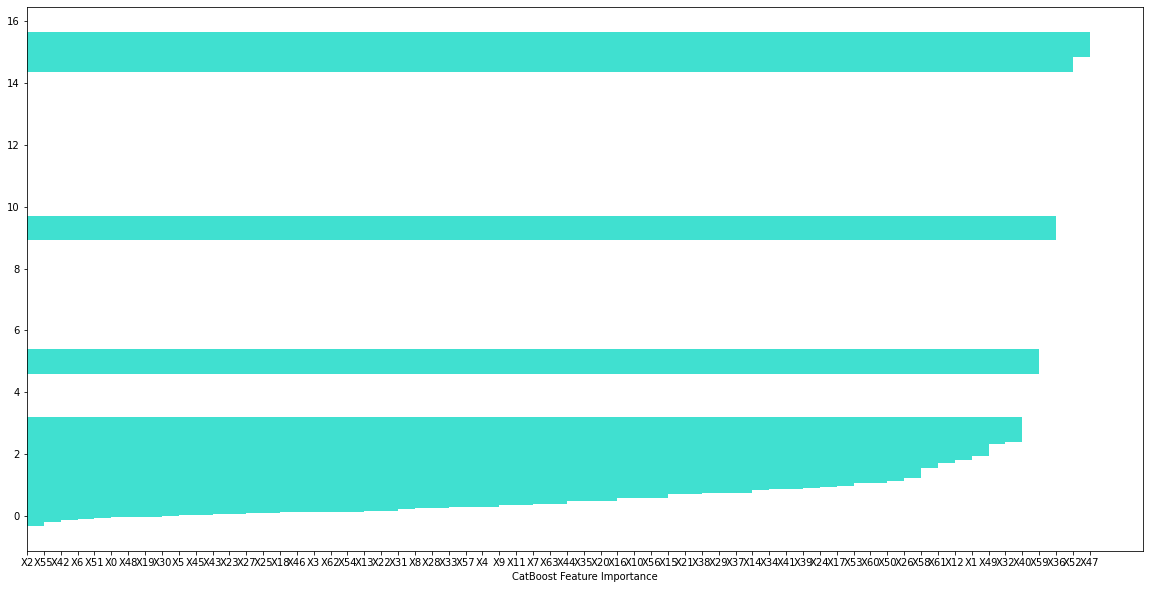

In [103]:
sorted_feature_importance = model_feature_importance[model_feature_importance.argsort()]
print(sorted_feature_importance)
plt.figure(figsize=(20,10))
plt.barh(sorted_feature_importance.values,
        sorted_feature_importance.index,
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [102]:
sorted_feature_importance.values

array([ 0.07113368,  0.07992755,  0.21143794,  0.27434493,  0.31106254,
        0.34623297,  0.36271329,  0.36793542,  0.37779762,  0.38315816,
        0.43772615,  0.44591268,  0.4479613 ,  0.46035906,  0.48688418,
        0.49804597,  0.5171615 ,  0.51834045,  0.52142334,  0.53186745,
        0.53578382,  0.54493982,  0.5543711 ,  0.61663334,  0.65406321,
        0.66157539,  0.68335113,  0.69051821,  0.69413632,  0.76400666,
        0.76726854,  0.77151849,  0.7876554 ,  0.87612706,  0.88957306,
        0.89830385,  0.96967038,  0.97522498,  0.99382539,  1.09403345,
        1.11896102,  1.13643841,  1.14531813,  1.15717764,  1.25428121,
        1.27614347,  1.27941817,  1.30586179,  1.33415988,  1.37729466,
        1.4704282 ,  1.47716809,  1.51557475,  1.62304779,  1.96023871,
        2.11821342,  2.1979848 ,  2.32778458,  2.73801393,  2.79194623,
        4.99187717,  9.31538243, 14.75173726, 15.26154247])

In [100]:
len(sorted_feature_importance)

64

In [95]:
#confusion_matrix = get_confusion_matrix(cb_model, Pool(X_train, y_train))
confusion_matrix_test = get_confusion_matrix(cb_model, Pool(X_test, y_test))
print(confusion_matrix_test.shape)
print(len(cb_model.classes_))
confusion_matrix_test_pd = pd.DataFrame(data=np.log(confusion_matrix_test+0.001), columns=cb_model.classes_, index=cb_model.classes_)

(14, 14)
14


In [96]:
precision_recall_fscore_support(y_test, predictions, average=None)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([2704,    1,  128, 1379,    4,  119,    1,    4,    2,   14,  195,
           2,    1,  127]))

In [98]:
precision_recall_fscore_support(y_test, predictions, average=None)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([2704,    1,  128, 1379,    4,  119,    1,    4,    2,   14,  195,
           2,    1,  127]))

In [82]:
precision_recall_fscore_support(y_test, predictions, average='micro')

(1.0, 1.0, 1.0, None)

In [83]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(1.0, 1.0, 1.0, None)

In [84]:
precision_recall_fscore_support(y_test, predictions, average=None, labels=cb_model.classes_)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([2704,    1,  128, 1379,    4,  119,    1,    4,    2,   14,  195,
           2,    1,  127]))

In [85]:
print(classification_report(y_test, predictions, target_names=cb_model.classes_))

                                           precision    recall  f1-score   support

     microtraits.cell_shape_enum:bacillus       1.00      1.00      1.00      2704
      microtraits.cell_shape_enum:branced       1.00      1.00      1.00         1
microtraits.cell_shape_enum:coccobacillus       1.00      1.00      1.00       128
       microtraits.cell_shape_enum:coccus       1.00      1.00      1.00      1379
        microtraits.cell_shape_enum:disc        1.00      1.00      1.00         4
     microtraits.cell_shape_enum:filament       1.00      1.00      1.00       119
        microtraits.cell_shape_enum:flask       1.00      1.00      1.00         1
     microtraits.cell_shape_enum:fusiform       1.00      1.00      1.00         4
    microtraits.cell_shape_enum:irregular       1.00      1.00      1.00         2
  microtraits.cell_shape_enum:pleomorphic       1.00      1.00      1.00        14
       microtraits.cell_shape_enum:spiral       1.00      1.00      1.00       195
   

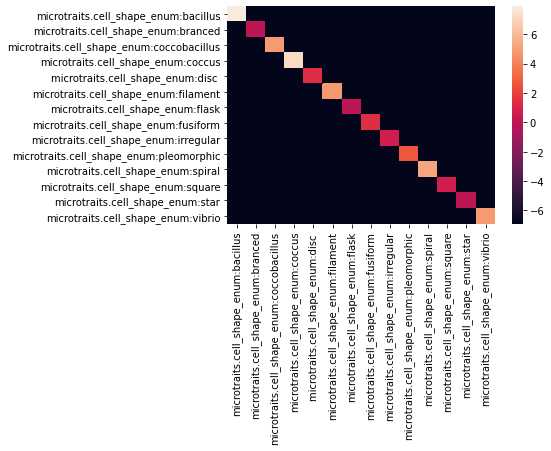

In [86]:
ax = sns.heatmap(confusion_matrix_test_pd)


In [87]:
shap_values = explainer_model.shap_values(X_test)

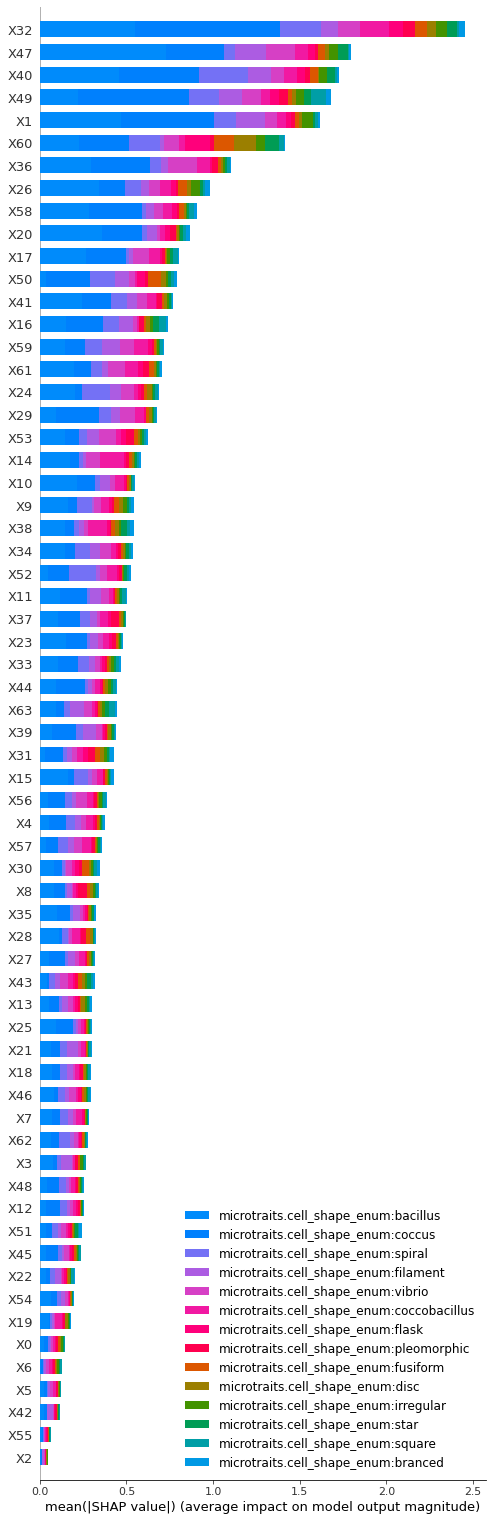

In [88]:
shap.summary_plot(shap_values, X_test, feature_names = cb_model.feature_names_,class_names=cb_model.classes_,max_display=X_test.shape[1])